<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО: Золотухина Евгения Олеговна**

**id из контеста: dap_econ_2022_271**

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:**

Любимый аник с семов по матстату: 

Профессор математики сошел с ума и попал в сумашедший дом. Бегает там по
коридорам, на психов бросается с криками: "Проинтегрирую! продифференцирую!".
Психи, естественно, в ужасе разбегаются, только один стоит и смеется. Профессор,
брызжа слюной, подбегает к нему: "Проинтегрирую! продифференцирую!". А тот
отвечает: " А мне пофиг! Я е в степени х! ".

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # слишком молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [3]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [4]:
# your code here
# (♡-_-♡) 
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.dtypes

Date    datetime64[ns]
A              float64
AAL            float64
AAP            float64
AAPL           float64
             ...      
ZBRA           float64
ZION           float64
ZM             float64
ZS             float64
ZTS            float64
Length: 521, dtype: object

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [5]:
# your code here
# ヽ(♡‿♡)ノ
df_inf['NASDAQ'].value_counts()[1]

103

Сколько ценных бумаг входят во все три индекса сразу?

In [6]:
# your code here
# (´｡• ᵕ •｡`) 
df_inf.loc[(df_inf['S&P-500'] == True) & (df_inf['NASDAQ'] == True) & (df_inf['DJI'] == True)].shape[0]

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [7]:
# your code here
# (◕‿◕)♡
df_inf.loc[(df_inf['S&P-500'] == True) & (df_inf['Founded'] >= 1800.0) & (df_inf['Founded'] < 1900.0)].shape[0]

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [8]:
# your code here
# (♡ﾟ▽ﾟ♡) 
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [9]:
# your code here
# ♡ (´｡• ω •｡`) ♡
lst = list(df_prices)[1:]
df_inf[~df_inf.Symbol.isin(lst)].shape[0]

63

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [10]:
# your code here
# (⌒_⌒;)
sectors = df_inf['GICS Sector'].value_counts().index.tolist()[:3]
df_inf.loc[(df_inf['S&P-500'] == True) & (df_inf['GICS Sector'].isin(sectors))].shape[0]

210

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__ Распределение стоимости акций визуально не похоже на нормальное, распределение не симметрично относительно среднего значения, это показывает, что данные около среднего значения встречаются реже, чем данные, далекие от среднего значения.
Благодаря графику с динамикой цен можно увидеть, что наблюдались резкие рост и падение цен акций на протяжении 10 лет. В основном к 2023 году наблюдается повышение стоимости акций в сравнении с ценами 2013.

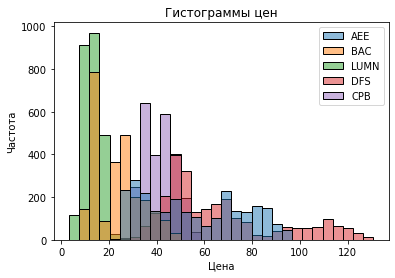

In [11]:
# your code here
# (＠_＠)
df1 = df_prices.iloc[:, :1]
df2 = df_prices.sample(n=5, random_state = 3, axis = 1)
df_new = df1.join(df2).set_index('Date')
sns.histplot(data=df_new, bins=30)
plt.title('Гистограммы цен')
plt.xlabel('Цена')
plt.ylabel('Частота');

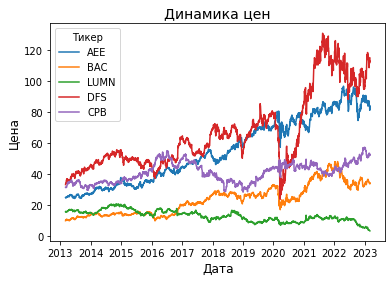

In [12]:
plt.plot(df_new['AEE'], label='AEE')
plt.plot(df_new['BAC'], label='BAC')
plt.plot(df_new['LUMN'], label='LUMN')
plt.plot(df_new['DFS'], label='DFS')
plt.plot(df_new['CPB'], label='CPB')
plt.legend(title='Тикер')
plt.ylabel('Цена', fontsize= 12)
plt.xlabel('Дата', fontsize= 12)
plt.title('Динамика цен', fontsize= 14);

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [13]:
# your code here
# (￢_￢) 
last_year = df_prices[(df_prices['Date'] >= '2022-03-03') & (df_prices['Date'] <= '2023-03-03')]
last_year = last_year.set_index('Date')
res = last_year.median().tolist()
names = last_year.median().index.tolist()
table1 = pd.DataFrame(list(zip(names, res)), columns =['Symbol', 'Median prices'])
table1 = table1.merge(df_inf[['Symbol', 'GICS Sector']], on = 'Symbol', how = 'left')
table1

,Symbol,Median prices,GICS Sector
0,A,132.664391,Health Care
1,AAL,14.425000,Industrials
2,AAP,175.889549,Consumer Discretionary
3,AAPL,148.966270,Information Technology
4,ABBV,147.720001,Health Care
...,...,...,...
515,ZBRA,307.419998,Information Technology
516,ZION,52.102430,Financials
517,ZM,84.084999,NaN
518,ZS,150.974998,NaN


In [14]:
table1[['GICS Sector', 'Median prices']].groupby(['GICS Sector']).quantile(.95).rename(columns={"Median prices": "95% quantile"})

,95% quantile
GICS Sector,
Communication Services,260.003003
Consumer Discretionary,1763.130005
Consumer Staples,243.992062
Energy,165.014986
Financials,350.159805
Health Care,523.568919
Industrials,432.061172
Information Technology,406.481459
Materials,289.814917


## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [15]:
# your code here
# (⊙_⊙)
df_r = (df_prices.set_index('Date').diff().iloc [1: , 0:])/(df_prices.set_index('Date').shift(1).iloc [1: , 0:])
df_r 

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ Да, распределения доходностей по акциям визуально похожи на нормальное распределение. Распределение практически симметрично относительно среднего значения, это показывает, что данные около среднего значения встречаются чаще, чем данные, далекие от среднего значения доходности акций.
«Усы» распространяются на первые точки данных, более чем в 1,5 раза превышающие межквартильный диапазон вне ящика с усами. Точки за пределами «усов» считаются выбросами. По нашему ящику видно, что выбросов довольно много.

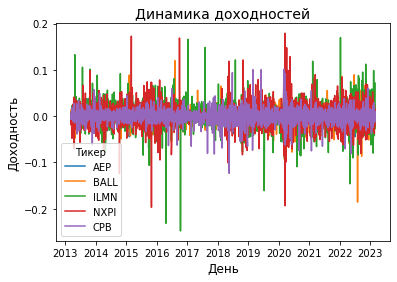

In [16]:
# your code here
# =^･ｪ･^=
df_r2 = df_r.sample(n=5, random_state = 3, axis = 1)
plt.plot(df_r2['AEP'], label='AEP')
plt.plot(df_r2['BALL'], label='BALL')
plt.plot(df_r2['ILMN'], label='ILMN')
plt.plot(df_r2['NXPI'], label='NXPI')
plt.plot(df_r2['CPB'], label='CPB')
plt.legend(title='Тикер')
plt.ylabel('Доходность', fontsize= 12)
plt.xlabel('День', fontsize= 12)
plt.title('Динамика доходностей', fontsize= 14);

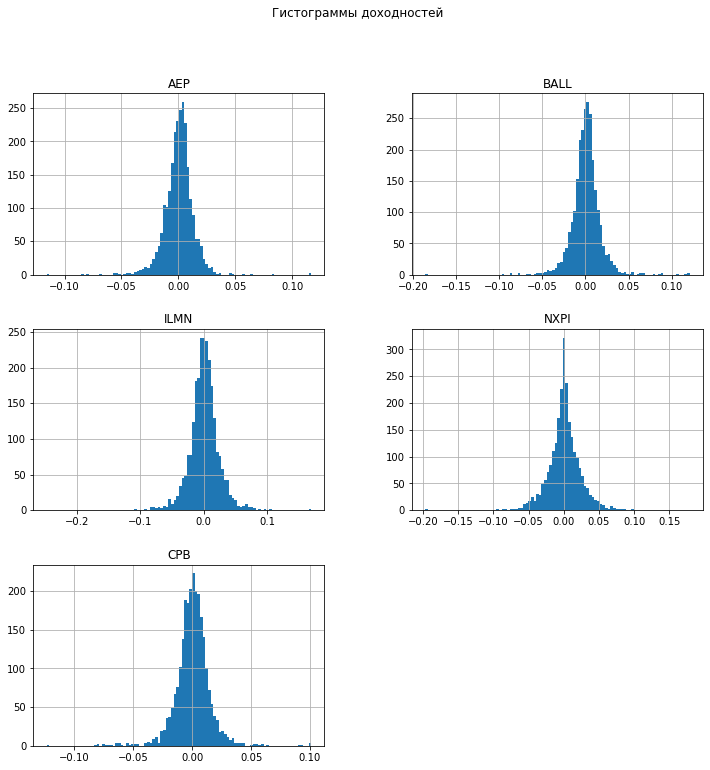

In [111]:
histo = df_r2.hist(figsize=[12, 12], bins = 100)
plt.suptitle('Гистограммы доходностей');

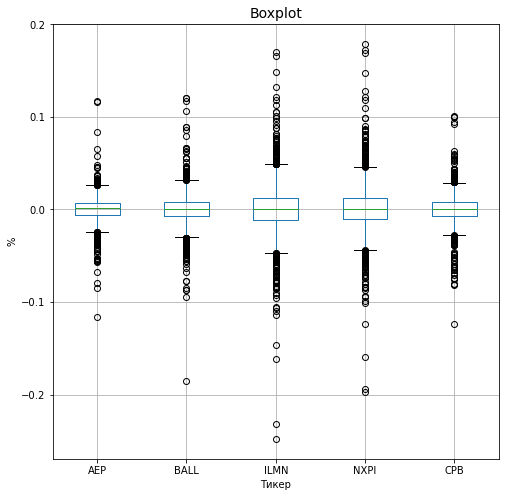

In [18]:
df_r2.boxplot(figsize=[8, 8])
plt.ylabel('%')
plt.xlabel('Тикер')
plt.title('Boxplot', fontsize= 14);

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

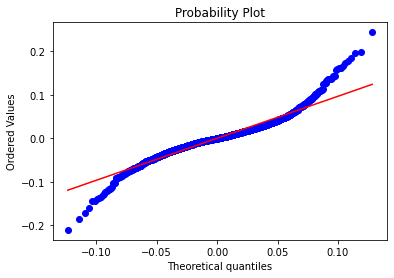

In [19]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [19]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

In [20]:
df_train

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.017064,0.019231,0.020376,0.016680,-0.010153,-0.011544,0.054785,0.012537,-0.007777,0.009612,...,-0.012635,0.015518,-0.005105,-0.001892,0.007342,0.040171,-0.039306,0.057202,0.100167,0.020796
2022-02-25,0.043543,0.029481,0.023704,0.012966,0.029394,0.029450,-0.020030,0.031082,0.035053,0.020053,...,0.026913,0.042822,0.036830,0.019446,0.026077,0.006597,0.060027,-0.012995,-0.157681,0.019691
2022-02-28,-0.025200,-0.012027,-0.005302,0.001638,-0.011836,0.004298,-0.023212,-0.014623,-0.009045,-0.020123,...,0.007451,-0.077526,-0.021775,-0.009214,0.003867,-0.011314,-0.001409,0.058091,0.077981,-0.005444


__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [21]:
# your code here
# C (・_・)ノ

R = df_train.mean()
yields = R.tolist()
companies = R.index.tolist()
newtable = pd.DataFrame(list(zip(companies, yields)), columns =['Ticker', 'Yield']).set_index('Ticker')
top = newtable['Yield'].nlargest(n=10).index.tolist()
bottom = newtable['Yield'].nsmallest(n=10).index.tolist()
print('10 самых доходных компаний:')
print(*top, sep = ", ")
print('10 самых убыточных компаний:')
print(*bottom, sep = ", ")
if "TSLA" in top:
    print("Да, Тесла есть среди самых доходных копманий.")
else:
    print("Нет, Тесла нет среди самых доходных копманий.")

10 самых доходных компаний:
CEG, LCID, MRNA, GFS, DDOG, CARR, ENPH, ZS, TSLA, CRWD
10 самых убыточных компаний:
RIVN, VTRS, KHC, GE, IBM, LUMN, KMI, SLB, BEN, WBD
Да, Тесла есть среди самых доходных копманий.


Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [22]:
# your code here
# ٩(ˊ〇ˋ*)و

STD = df_train.std()
dev = STD.tolist()
comp = STD.index.tolist()
new_table = pd.DataFrame(list(zip(comp, dev)), columns =['Ticker', 'Standart deviation']).set_index('Ticker')
risk = new_table['Standart deviation'].nlargest(n=10).index.tolist()
risk_free = new_table['Standart deviation'].nsmallest(n=10).index.tolist()
print('10 самых рисковых компаний:')
print(*risk, sep = ", ")
print('10 самых безрисковых компаний:')
print(*risk_free, sep = ", ")
if "TSLA" in risk:
    print("Да, Тесла есть среди самых рисковых копманий.")
else:
    print("Нет, Тесла нет среди самых рисковых копманий.")


10 самых рисковых компаний:
RIVN, LCID, ENPH, MRNA, PDD, ZM, GFS, SEDG, CRWD, DDOG
10 самых безрисковых компаний:
VZ, JNJ, KO, PG, RSG, WM, PEP, CL, MMC, COST
Нет, Тесла нет среди самых рисковых копманий.


Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [23]:
df_result = newtable.merge(new_table, on = 'Ticker', how = 'left').reset_index()
df_result

,Ticker,Yield,Standart deviation
0,A,0.000808,0.015556
1,AAL,0.000579,0.031476
2,AAP,0.000659,0.020050
3,AAPL,0.001268,0.017579
4,ABBV,0.000925,0.017331
...,...,...,...
515,ZBRA,0.001256,0.023282
516,ZION,0.000733,0.020683
517,ZM,0.001823,0.042788
518,ZS,0.002762,0.037999


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Можно купить акции CARR с доходностью 0.003140 (у Тесла 0.002746) и риском 0.029273 (у Тесла 0.035673)

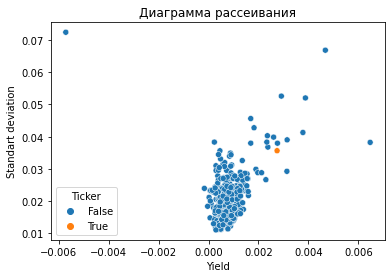

In [134]:
# your code here
# (っ˘ڡ˘ς) 
sns.scatterplot(data=df_result, x="Yield", y="Standart deviation", hue=(df_result['Ticker'] == 'TSLA'), legend = True)
plt.title('Диаграмма рассеивания');

In [153]:
df_result.loc[(df_result['Ticker'] == 'CARR') | (df_result['Ticker'] == 'TSLA')]

,Ticker,Yield,Standart deviation
78,CARR,0.003140,0.029273
463,TSLA,0.002746,0.035673


Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [25]:
# your code here
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ

VaR =  (df_train.quantile(.05))
var = VaR.tolist()
company_names = VaR.index.tolist()
data_var = pd.DataFrame(list(zip(company_names, var)), columns =['Ticker', 'VaR']).set_index('Ticker')
top_10 = data_var['VaR'].nlargest(n=10).index.tolist()
bottom_10 = data_var['VaR'].nsmallest(n=10).index.tolist()
print('10 самых рискованных компаний:')
print(*top_10, sep = ", ")
print('10 наименее рискованных компаний:')
print(*bottom_10, sep = ", ")

10 самых рискованных компаний:
WM, PG, KO, RSG, MCD, PEP, JNJ, SO, VZ, CL
10 наименее рискованных компаний:
RIVN, LCID, ENPH, MRNA, PDD, ZM, GFS, CEG, DDOG, SEDG


In [26]:
# добавим получившиеся значения в нашу таблицу
df_result_2 = newtable.merge(new_table, on = 'Ticker', how = 'left')
df_result_2 = df_result_2.merge(data_var, on = 'Ticker', how = 'left').reset_index()
df_result_2.VaR = df_result_2.VaR*(-1)
df_result_2

,Ticker,Yield,Standart deviation,VaR
0,A,0.000808,0.015556,0.025164
1,AAL,0.000579,0.031476,0.044087
2,AAP,0.000659,0.020050,0.026499
3,AAPL,0.001268,0.017579,0.025629
4,ABBV,0.000925,0.017331,0.024926
...,...,...,...,...
515,ZBRA,0.001256,0.023282,0.030612
516,ZION,0.000733,0.020683,0.030714
517,ZM,0.001823,0.042788,0.061953
518,ZS,0.002762,0.037999,0.055926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

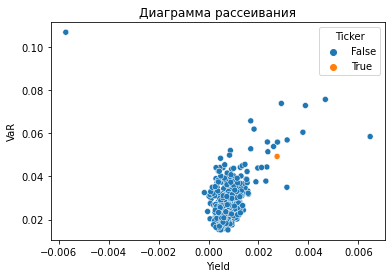

In [34]:
# your code here
# ٩(x̯x)۶
sns.scatterplot(data=df_result_2, x="Yield", y="VaR", hue=(df_result_2['Ticker'])=='TSLA', legend = True)
plt.title('Диаграмма рассеивания');

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [185]:
# your code here
# ( ͡⊙ ͜ʖ ͡⊙)
var_TSLA = data_var.loc['TSLA'][0]
ES_TSLA = df_train['TSLA'][df_train['TSLA'] < var_TSLA].mean()
best_cases = df_train['TSLA'][df_train['TSLA'] > var_TSLA].mean()
print('ES для Тесла:', ES_TSLA)
print('Потеряем:', 1000*ES_TSLA)
print('Заработаем:', 1000*best_cases)

ES для Тесла: -0.07554044469806388
Потеряем: -75.54044469806388
Заработаем: 6.895411483065291


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [29]:
# your code here
# \_(ツ)_/¯
ES = df_train[df_train < VaR].mean()
ES_lst = ES.tolist()
company_lst = ES.index.tolist()
data_ES = pd.DataFrame(list(zip(company_lst, ES_lst)), columns =['Ticker', 'ES']).set_index('Ticker')

In [30]:
var_result = df_result_2.merge(data_ES, on = 'Ticker', how = 'left')
var_result.ES = var_result.ES*(-1)
var_result = var_result.round(3)
var_result = var_result.sort_values(by='ES', ascending=False)
var_result.rename(columns = {'Yield':'r', 'Standart deviation':'std'}, inplace = True )
var_result = var_result.reindex(columns=['Ticker', 'std', 'r', 'VaR', 'ES'])
var_result

,Ticker,std,r,VaR,ES
405,RIVN,0.072,-0.006,0.107,0.138
275,LCID,0.067,0.005,0.076,0.125
162,ENPH,0.053,0.003,0.074,0.105
322,MRNA,0.052,0.004,0.073,0.104
370,PDD,0.046,0.002,0.066,0.092
...,...,...,...,...,...
413,RSG,0.011,0.001,0.016,0.026
500,WM,0.011,0.001,0.015,0.026
376,PG,0.011,0.000,0.015,0.026
373,PEP,0.011,0.001,0.016,0.025


In [31]:
var_result.to_csv('var_result.csv', sep=",", index = False, line_terminator = None)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

__никнейм:__ dap_econ_2022_271 
__ссылка:__ https://official.contest.yandex.ru/contest/47242/run-report/84993903/ 

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [32]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

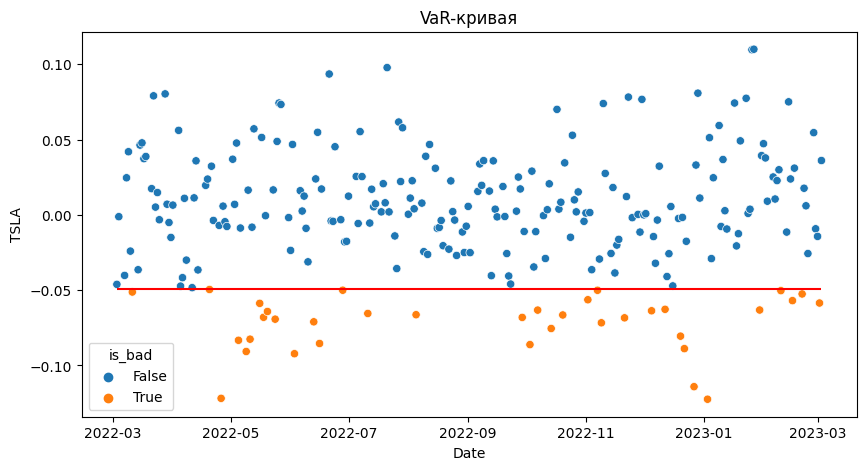

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

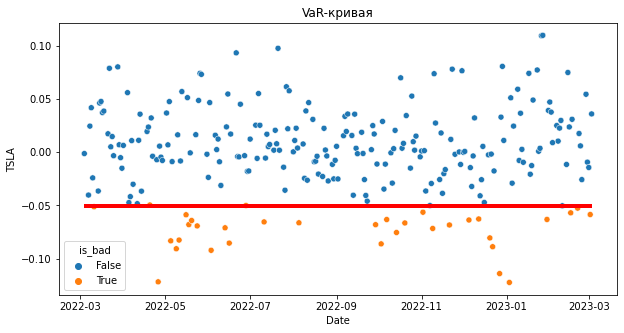

In [254]:
# your code here
# ʕ•ᴥ•ʔ
var_curve = []
df_rr = df_r.reset_index()
df_tsla_test = df_rr[['Date', 'TSLA']].loc[(len(df_train)+1):len(df_rr)]
for index in range((len(df_train)+1), len(df_rr)):
    var_curve.append(df_rr['TSLA'].loc[(index-len(df_train)):(index-1)].quantile(.05))
var_curve
df_tsla_test['is_bad'] = (df_tsla_test['TSLA'].values < var_curve)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla_test, x='Date', y='TSLA', hue='is_bad')
plt.hlines(var_curve, df_tsla_test.Date.min(), df_tsla_test.Date.max(), color='red')
plt.title('VaR-кривая');

_Источник:_ http://rstudio-pubs-static.s3.amazonaws.com/111974_cbba4002cf0b4798bba85549400bc33e.html#-var:~:text=VaR%20%D0%BD%D0%B0%D0%B9%D0%B4%D0%B5%D0%BD%20%D1%85%D0%BE%D1%80%D0%BE%D1%88%D0%BE.-,%D0%90%20%D0%BF%D0%BE%D1%87%D0%B5%D0%BC%D1%83%20%D0%B2%D1%81%D0%B5%20%D1%8D%D1%82%D0%BE%20%D0%BF%D0%BB%D0%BE%D1%85%D0%BE%3F,VaR%22)%0Alines(VaR%2C%20col%3D%22red%22),-%D0%A7%D1%82%D0%BE%20%D0%BD%D1%83%D0%B6%D0%BD%D0%BE%20%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C 

In [255]:
df_tsla_test['is_bad'].mean()

0.13545816733067728

In [256]:
print((df_tsla['is_bad'].mean()) - (df_tsla_test['is_bad'].mean()))

0.007398975526465568


__ВЫВОД:__ Следовательно, наше среднее значение по "пробитию" VAR уменьшилось на 0.007398975526465568. Цифра улучшилась.

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [155]:
df = pd.read_csv('data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
# ┌(ಠ_ಠ)┘
df['id'].nunique()

3898

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

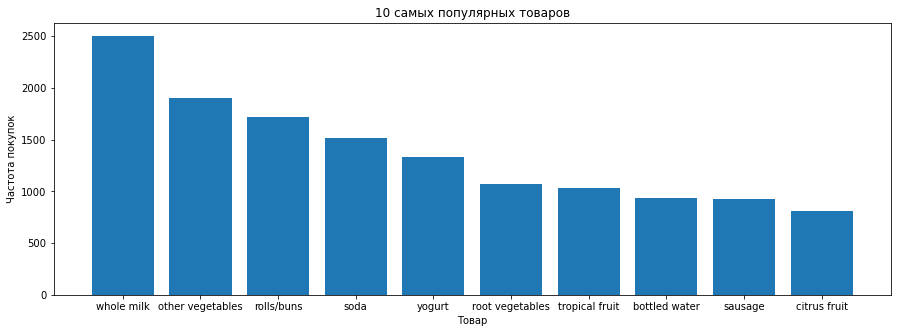

In [5]:
# your code here
# ( .-. )
freq = df['product'].value_counts()[:10]
plt.figure(figsize=(15, 5))
plt.bar(freq.index.tolist(), freq.tolist()) 
plt.xlabel('Товар')
plt.ylabel('Частота покупок')
plt.title('10 самых популярных товаров');

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

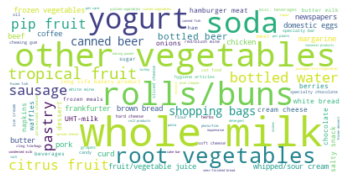

In [6]:
from wordcloud import WordCloud

# your code here
# ฅ^•ﻌ•^ฅ 
text = df['product'].value_counts().to_dict()
wordcloud = WordCloud(background_color="white", collocations=True).generate_from_frequencies(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [7]:
# your code here
# ٩(⁎❛ᴗ❛⁎)۶
pv = pd.pivot_table(df, index=["id"], columns = ['product'], values = 'fielddate', aggfunc='count', fill_value=0)
pv

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [8]:
# your code here
# ヾ(๑╹◡╹)ﾉ
corrM = pv.corr() - np.eye(167)
corrM

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
product,,,,,,,,,,,,,,,,,,,,,
Instant food products,0.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,0.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,0.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,0.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,0.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,0.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,0.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,0.000000,0.103533,0.043075


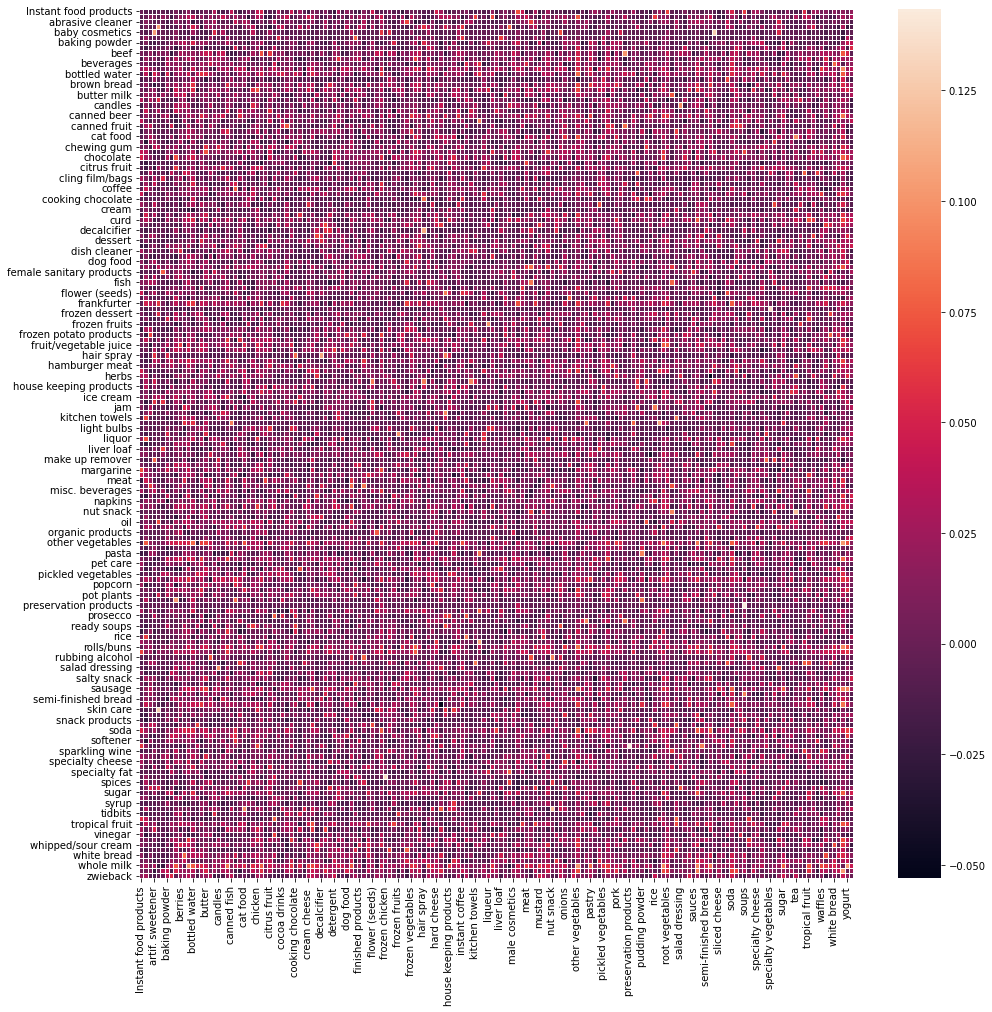

In [9]:
plt.figure(figsize = (16,16))
graph = sns.heatmap(corrM, linewidth=.5)
graph.set(xlabel="", ylabel="");

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [10]:
# your code here
# ༼ つ ಥ_ಥ ༽つ
most_freq = corrM['domestic eggs'].nlargest(n=10).index.tolist()
print('10 продуктов, которые чаще всего покупают вместе с яйцами:')
print(*most_freq, sep = ", ")

10 продуктов, которые чаще всего покупают вместе с яйцами:
meat spreads, whole milk, newspapers, rubbing alcohol, meat, oil, coffee, fruit/vegetable juice, white wine, specialty bar


In [11]:
less_freq = (corrM['domestic eggs'][(corrM['domestic eggs'] < 0)]).index.tolist()
print('Продукты, которые реже всего покупают вместе с яйцами:')
print(*less_freq, sep = ", ")

Продукты, которые реже всего покупают вместе с яйцами:
artif. sweetener, brandy, cake bar, candles, canned fish, cocoa drinks, cooking chocolate, cream, dental care, dessert, flower soil/fertilizer, frozen chicken, frozen fruits, hair spray, hamburger meat, herbs, jam, ketchup, kitchen utensil, liqueur, male cosmetics, nut snack, organic products, pet care, popcorn, potato products, preservation products, prosecco, pudding powder, ready soups, salad dressing, sauces, snack products, soft cheese, specialty cheese, specialty vegetables, spices, sweet spreads, tidbits, turkey


Какие два продукта коррелируют сильнее всего? 

In [12]:
# your code here
# ( ￣ー￣)
max_value_by_columns = corrM.max()
max_value = max(max_value_by_columns)
idx = np.where(corrM == max_value)
print(corrM.columns[(idx[0][0])], '&', corrM.index[(idx[0][1])])

preservation products & soups


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ 1) Коэффициент корреляции Пирсона чувствителен к выбросам. При наличии в выборке единственного выброса величина коэффициента корреляции Пирсона может существенно снижаться. 2) На значение данного коэффициента влияют факторы, которые могут быть не всегда справедливы по отношению к некоторым продуктам, поскольку данный коэффициент основывается и подсчитывается на таких предположениях как наличие линейной зависимости, причинно-следственной связи и т. д.

## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [156]:
from sklearn.metrics import matthews_corrcoef
from itertools import combinations

# your code here
# (⌐■_■)
cross_table = pd.crosstab(index=df["id"], columns = df['product'], values = 'product', aggfunc = 'nunique').fillna(0).astype(int)
cross_table = cross_table.loc[:, cross_table.sum(axis=0) >= 10]
cross_table

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
result_matthews = pd.DataFrame(columns=['product_1', 'product_2', 'matthews_corrcoef'])
products = cross_table.columns.values
for i, k in combinations(products, 2):
    mattcor = matthews_corrcoef (cross_table[i], cross_table[k])
    result_matthews = result_matthews.append({'product_1': i, 'product_2': k, 'matthews_corrcoef': mattcor}, ignore_index=True)
result_matthews   

,product_1,product_2,matthews_corrcoef
0,Instant food products,UHT-milk,-0.005502
1,Instant food products,abrasive cleaner,-0.009420
2,Instant food products,artif. sweetener,-0.010825
3,Instant food products,baking powder,-0.010363
4,Instant food products,bathroom cleaner,-0.008275
...,...,...,...
11776,white wine,yogurt,0.042513
11777,white wine,zwieback,-0.006570
11778,whole milk,yogurt,0.093302
11779,whole milk,zwieback,0.035588


In [158]:
sorted_result_matthews = result_matthews.sort_values(by='matthews_corrcoef', ascending=False)
sorted_result_matthews

,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.094040
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302
...,...,...,...
10259,pet care,salty snack,-0.033813
8570,kitchen towels,pork,-0.034400
1141,berries,photo/film,-0.034996
8962,long life bakery product,red/blush wine,-0.037910


In [72]:
sorted_result_matthews.head(100).to_csv('result_matthews.csv', index = False, line_terminator ="")

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__никнейм:__ dap_econ_2022_271 
__ссылка:__ https://official.contest.yandex.ru/contest/47242/run-report/84931336/ 

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [174]:
# your code here
#  ლ(ಠ益ಠლ)
lift_1 = (cross_table[['whole milk', 'domestic eggs']].all(axis=1).mean()) / ((cross_table['whole milk'].mean()) * (cross_table['domestic eggs'].mean()))
lift_1

1.152241691425711

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [167]:
# your code here
# (❍ᴥ❍ʋ)
result_lift = pd.DataFrame(columns=['product_1', 'product_2', 'lift'])
prods = cross_table.columns.values
for item, jtem in combinations(prods, 2):
    intersection = cross_table[[item, jtem]].all(axis=1).mean()
    denominator = (cross_table[item].mean()) * (cross_table[jtem].mean())
    lift = intersection / denominator
    result_lift = result_lift.append({'product_1': item, 'product_2': jtem, 'lift': lift}, ignore_index=True)
result_lift  

,product_1,product_2,lift
0,Instant food products,UHT-milk,0.849237
1,Instant food products,abrasive cleaner,0.000000
2,Instant food products,artif. sweetener,0.000000
3,Instant food products,baking powder,0.536915
4,Instant food products,bathroom cleaner,0.000000
...,...,...,...
11776,white wine,yogurt,1.314976
11777,white wine,zwieback,0.755426
11778,whole milk,yogurt,1.161510
11779,whole milk,zwieback,1.309518


In [168]:
sorted_result_lift = result_lift.sort_values(by='lift', ascending=False)
sorted_result_lift

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
...,...,...,...
6182,female sanitary products,seasonal products,0.000000
9746,nuts/prunes,specialty fat,0.000000
9747,nuts/prunes,specialty vegetables,0.000000
9748,nuts/prunes,spices,0.000000


In [169]:
sorted_result_lift.head(100).to_csv('result_lift.csv', sep=",", index = False, line_terminator = None)

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__никнейм:__ dap_econ_2022_271 
__ссылка:__ https://official.contest.yandex.ru/contest/47242/run-report/85096100/

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  - Коэффициент корреляции Мэтьюса является частным случаем коэффициента корреляции Пирсона. Значения корреляций Мэтьюса для пар с самой высокой и низкой корреляцией близки к 0, так что связь между данными продуктами практически отсутствтует. Удивительно, что коэффициент корреляции для "нелогичных" пар продуктов (например, кошачий корм и чай) больше, чем для более "логичных" (например, говядина и картофель). 
Если говорить о том, когда может покупаться пара canned fruit/potato products, то в целом необычное сочетание картофеля и фруктов (например, груши, яблоки, абрикосы) встречается в кулинарии, однако под potato products вряд ли понимается картофель сам по себе, возможно, человек, который не любит готовить, решил попробовать такое необычное сочетание вкусов чипсов и фруктов, наткнувшись на какой-нибудь рецепт с картофелем и фрутами в инсте... (￢_￢;)

-Не все пары с высоким lift достаточно логичны. Значние lift >= 1 говорит о том, что один продукт чаще появляется в транзакциях, содержащих второй продукт, чем в остальных, где первый продукт покупается отдельно.

-Между результатами двух методов наблюдаются некоторые пересечения, например, пары nut snack/tea; honey/ketchup; canned fruit/potato products входят в список с самыми высокими значениями для обоих показателей. Сходства могут наблюдаться из-за того, что оба метода устойчивы по отношению к различиям числа наблюдений для каждого продукта в паре, так как при расчёте значений используется таблица сопряжённости и учитывается не только само "предсказание"(что пара продуктов покупается вместе), но и "наблюдение", то есть покупка каждого товара в отдельности. 
Кроме того, результаты данных методов можно легко интерпретировать.    	

In [170]:
# your code here
# (｡❤‿❤｡)
sorted_result_matthews.head(10)

,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.094040
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302
8582,kitchen towels,rum,0.089588
8417,jam,rice,0.088470
2954,canned fruit,potato products,0.088020
3254,cat food,tea,0.087834
6354,fish,meat spreads,0.086703


In [172]:
sorted_result_matthews.tail(10)

,product_1,product_2,matthews_corrcoef
10431,pip fruit,soups,-0.032088
8725,liquor,pip fruit,-0.032196
10845,red/blush wine,semi-finished bread,-0.032391
8138,hygiene articles,mayonnaise,-0.032691
9227,meat,mustard,-0.033340
10259,pet care,salty snack,-0.033813
8570,kitchen towels,pork,-0.034400
1141,berries,photo/film,-0.034996
8962,long life bakery product,red/blush wine,-0.037910
7921,herbs,shopping bags,-0.052079


In [171]:
sorted_result_lift.head(10)

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
2954,canned fruit,potato products,16.874459
7114,frozen fruits,tidbits,16.107438
7993,honey,prosecco,15.781377
8009,honey,skin care,14.992308
4713,cooking chocolate,prosecco,13.677193


__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]